# Dense network

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [2]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy(verbose=False)

Time to load Tensor Flow libraries :-)

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout



## 1-N Layer

So, the question here is to build a 1-n neural network to make inage recognition.

For this first network, I've decided to use the low level Trnsor Flow API, Keras will be used later to build the 2-N neural network.

Let's start building the 1-N model.

    Note: The number of classes the model needs to use is grabed from the data structure

In [4]:

# Number of outputs
NB_CLASS=len(data['class_name'])


# Create model
model_1n = Sequential()

# Hidden layer
model_1n.add(Dense(
    units=512, activation=activations.relu, input_dim=data['FEATURE_SIZE'],
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))

# Output layer
model_1n.add(Dense(
    units=NB_CLASS, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))
          

# Print network summary
model_1n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 1,052,166
Trainable params: 1,052,166
Non-trainable params: 0
_________________________________________________________________


Set the *sgd* function as optimizer and *sparse_categorical_crossentropy* as loss function.

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model_1n.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

And finally fit the model against my *trainX* dataset

In [6]:
# Fit model
history = model_1n.fit(
    x=X['trainX'], y=y['trainX'],
    validation_split=0.2, batch_size=64, epochs=30,
    shuffle=True # Shuffle training samples
)

Train on 336 samples, validate on 84 samples
Epoch 1/30
336/336 [==============================] - 1s 2ms/step - loss: 2.8543 - acc: 0.2292 - val_loss: 2.6898 - val_acc: 0.1429
Epoch 2/30
336/336 [==============================] - 0s 254us/step - loss: 2.3615 - acc: 0.6280 - val_loss: 2.5374 - val_acc: 0.4286
Epoch 3/30
336/336 [==============================] - 0s 229us/step - loss: 2.1246 - acc: 0.7083 - val_loss: 2.3511 - val_acc: 0.5000
Epoch 4/30
336/336 [==============================] - 0s 229us/step - loss: 1.9650 - acc: 0.7619 - val_loss: 2.2216 - val_acc: 0.6071
Epoch 5/30
336/336 [==============================] - 0s 247us/step - loss: 1.8439 - acc: 0.8036 - val_loss: 2.1357 - val_acc: 0.6905
Epoch 6/30
336/336 [==============================] - 0s 265us/step - loss: 1.7536 - acc: 0.8393 - val_loss: 2.0149 - val_acc: 0.7381
Epoch 7/30
336/336 [==============================] - 0s 226us/step - loss: 1.6809 - acc: 0.8690 - val_loss: 1.9534 - val_acc: 0.7262
Epoch 8/30
336/336 

Draw the loss and accuracy for train and validation dataset for each epoch.

This will demonstrate that the model is quickly improving it's accuracy on the first epoch and then finaly stabilzed around 95%

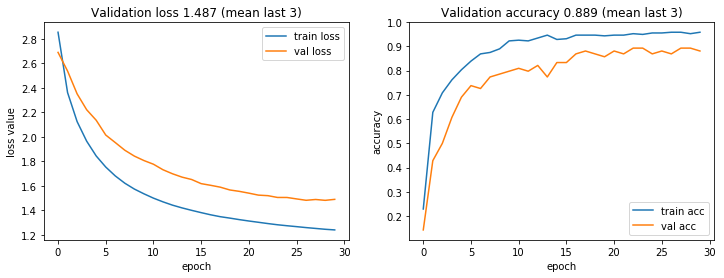

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

Display the final result we have:

In [8]:
(test_loss, test_accuracy) = model_1n.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

51/51 [==============================] - 0s 189us/step
Test loss: 1.31
Test accuracy: 94.12%


## 2-N layer

To build this 2-N neural network, I will use the Keras API

In [9]:
import tensorflow.keras as keras
from tensorflow.keras import activations


# Number of outputs
NB_CLASS=len(data['class_name'])


model_2n = tf.keras.Sequential()
model_2n.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(data['FEATURE_SIZE'],)))
# model.add(keras.layers.Dropout(rate=0.5))
model_2n.add(tf.keras.layers.Dense(128, activation='relu'))
#model_2.add(tf.keras.layers.Dense(32, activation='relu'))
model_2n.add(tf.keras.layers.Dense(6, activation='softmax'))
# model_3.compile(optimizer='sgd', loss='mse', metrics=['acc'])
model_2n.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 1,115,526
Trainable params: 1,115,526
Non-trainable params: 0
_________________________________________________________________


This time I've choosen the *Adamax* optimizer function and *categorical_crossentropy* loss function.

In [10]:
# Compile the model
model_2n.compile(optimizer=keras.optimizers.Adamax(), loss='sparse_categorical_crossentropy', metrics=['acc'])
model_2n.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

Define an early stopping callback function to stop the fitting process when a certain loss value is reached

In [11]:
# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

And simply fit the model

In [12]:
history=model_2n.fit(X['trainX'], y['trainX'], batch_size=64, epochs=30, validation_split=0.2, callbacks=[early_stopping])

Train on 336 samples, validate on 84 samples
Epoch 1/30
336/336 [==============================] - 1s 2ms/step - loss: 1.6039 - acc: 0.4435 - val_loss: 1.6218 - val_acc: 0.3571
Epoch 2/30
336/336 [==============================] - 0s 117us/step - loss: 1.1925 - acc: 0.6786 - val_loss: 1.4457 - val_acc: 0.5119
Epoch 3/30
336/336 [==============================] - 0s 140us/step - loss: 0.9650 - acc: 0.7440 - val_loss: 1.2316 - val_acc: 0.5952
Epoch 4/30
336/336 [==============================] - 0s 130us/step - loss: 0.7998 - acc: 0.8185 - val_loss: 1.1121 - val_acc: 0.6905
Epoch 5/30
336/336 [==============================] - 0s 128us/step - loss: 0.6845 - acc: 0.8512 - val_loss: 0.9856 - val_acc: 0.6905
Epoch 6/30
336/336 [==============================] - 0s 139us/step - loss: 0.5955 - acc: 0.8750 - val_loss: 0.9203 - val_acc: 0.7143
Epoch 7/30
336/336 [==============================] - 0s 132us/step - loss: 0.5326 - acc: 0.8750 - val_loss: 0.8259 - val_acc: 0.7262
Epoch 8/30
336/336 

Again, draw the loss and accuray overs the different epoch's

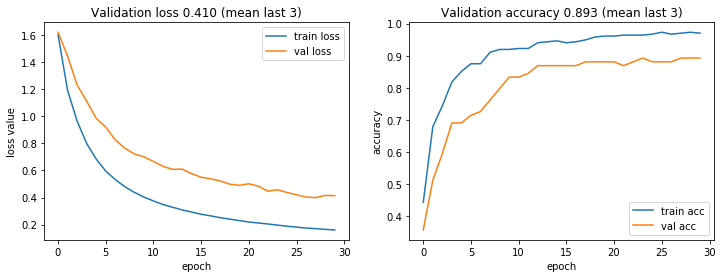

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

Display the final result we have:

In [15]:
(test_loss, test_accuracy) = model_2n.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

51/51 [==============================] - 0s 135us/step
Test loss: 0.24
Test accuracy: 92.16%


## Save model

It's now time to save the model in order to use it in the last Notebook of this project.

As we can not use 'pickle' to save *keras.Sequential* objects, my *saveModel()* and *loadModel()* function have been improved to handle *keras.Sequential* objects.

How ?

Well, the *saveModel()* function now check the type of model passed as paramter. If it matches *keras.Sequential* type, then I use the *kera.models.save_model()* instead *pickle*.

For the *loadModel()*, as I do not know which kind of model is saved before trying to load it, I'll use a *try{} / catch Exception* block. If the files is correctly loaded using *keras.model.load_model()* then I return the *keras.Sequential* object, if not, then I use *pickle* in the *catch* block to return the model.

Here is the new saveModel() function definition:

    def saveModel(model, name):
        """
        Function that saves on disk the model passed as first parameter.
        It uses the function getModelFilename() with the 'name' parameter
        to get the filename where to save the model.
        This function checks the type of model received. If it's a keras.Sequential,
        then it uses the keras.models.save_model fuinction to save it.
        Use pickle otherwise.
        """
        filename=getModelFilename(name)
        # Save model to disk
        if isinstance(model, keras.Sequential):
            print("Saving model {} to {} using 'keras.models.save_model' library".format(name, filename))
            keras.models.save_model(model, filename, overwrite=True)
        else:
            print("Saving model {} to {} using 'pickle' library".format(name, filename))
            pickle.dump(model, open(filename, 'wb'))

And the new loadModule() function definition:

    def loadModel(name):
        """
        Function that loads from disk the model of which name is passed as first parameter.
        It uses the function getModelFilename() with the 'name' parameter
        to get the filename from where to load the model
        This function tries to first load the model using pickle. If it fails, then
        it fallback to keras.models.load_model function, as the content of the file might be
        a keras object if loading fails with pickle.
        """
        filename=getModelFilename(name)
        # load the model from disk
        print("Loading model from ", filename)
        model=None
        try:
            model=pickle.load(open(filename, 'rb'))
            print("Model loaded using pickle()")
        except:
            model=keras.models.load_model(filename)
            print("Model loaded using keras.models.load_model()")
        finally:
            return model


Now I can save my KNN models on disk, the same way I do for others.


In [20]:
saveModel(model_1n, '1-layer-nn')

Saving model 1-layer-nn to model-1-layer-nn.sav using 'keras.models.save_model' library


In [21]:
saveModel(model_2n, '2-layer-nn')

Saving model 2-layer-nn to model-2-layer-nn.sav using 'keras.models.save_model' library


## Try model

To try the model I've built, I will pick up a picture from my test dataset and grab the prediction I get for each class (bike, car, truck, ...)

To check the result, let's display first the 11th picture from the *valid* dataset.

Obviusly, it's a bike. This is confirmed by the filename of the picture, if you have any doubt ;-)

And to be sure that the models I've saved work, I will load them from disk using my *loadModel()* function.

bike/bike-0111.png


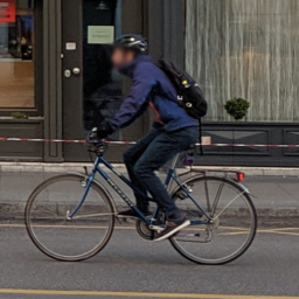

In [42]:
from PIL import Image
import os

image_idx=11
dataset='test'

# Use data_dict to get the filename of the image
img=Image.open(os.path.join('data', dataset, data[dataset]['filenames'][image_idx]))

# Resize it to get a result more inline with the above picture
print(data[dataset]['filenames'][image_idx])
img.resize((299,299), Image.BICUBIC)

As a reminder, here are the classes name and id in our dataset:

In [43]:
for (i, item) in enumerate(data['class_name'], start=0):
    print(i, item)

0 bike
1 car
2 motorcycle
3 other
4 truck
5 van


So, bike is class 0, our prediction should shows a result in column 0.

### Try the 1 layer model

In [44]:
model_from_disk=loadModel('1-layer-nn')

pd.DataFrame(model_from_disk.predict(X[dataset][image_idx:image_idx+1]))


Loading model from  model-1-layer-nn.sav
Model loaded using keras.models.load_model()


,0,1,2,3,4,5
0,0.983662,0.002266,0.00331,0.007274,0.002355,0.001133


Hey, quite good, 98% in the first column which is the one related to the bike class. Good job :-)

### Try the 2 layer model

In [45]:
model_from_disk=loadModel('2-layer-nn')

pd.DataFrame(model_from_disk.predict(X[dataset][image_idx:image_idx+1]))


Loading model from  model-2-layer-nn.sav
Model loaded using keras.models.load_model()


,0,1,2,3,4,5
0,0.994567,0.000969,0.0007,0.003226,0.000304,0.000235


Wow... 99,4% prediction for a bike !
Good job :-)

It's time to follow on the next Notebook and explore Convolutional neural networks...